설정
---

In [58]:
# 파이썬2와 호환하기 위해
# division : 나누기 연산자 변경
# print_function : print를 함수로 만들기
# unicode_literals : 파이썬 3000의 바이트 열 리터럴
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# matplotlib 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더 주소 
PROJECT_ROOT_DIR = r"C:\Users\default.DESKTOP-S5Q9GAA\Documents\Programs\study_datascience\scikit_learn\handson"
CHAPTER_ID = "end_to_end_project"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)

# 그림을 저장할 폴더 만들기
#os.makedirs(IMAGE_PATH)

def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    if tight_layout:
        plt.tight_layout() # 그림이 그려지는 공간에 그림이 맞게 적용되게 함
    # 위치, 확장자, 인치당 픽셀의 수
    plt.savefig(path, format = fig_extension, dpi = resolution)

데이터 다운로드
-----

In [3]:
import tarfile # 압축을 사용하는 tar 아카이브를 읽고 쓰는 것을 가능케 함
from six.moves import urllib # 파이썬 2와 3에서 모두 작용하는 라이브러리 모음집

# 다운로드 받는 URL주소
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'

# 다운로드 받을 주소
HOUSING_PATH = os.path.join('datasets', 'housing')

# 다운로드 받는 URL 세부 주소
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'


# 다운로드 받는 함수
def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):
    # 다운로드 받을 주소 생성하기
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    # 다운로드 받을 주소 생성하기2
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# 데이터 다운받기
fetch_housing_data()

In [5]:
# 데이터 적재함수 만들기
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [6]:
# 데이터 적재하기
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


데이터 살펴보기
------

In [7]:
# 데이터 살펴보기
housing.info()

# 10개의 특성
# 각 20640의 값
# total_bedrooms는 107개의 널 값이 있음
# 9개의 특성은 float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# 숫자형이 아닌 데이터 살펴보기
# 텍스트형 특성
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


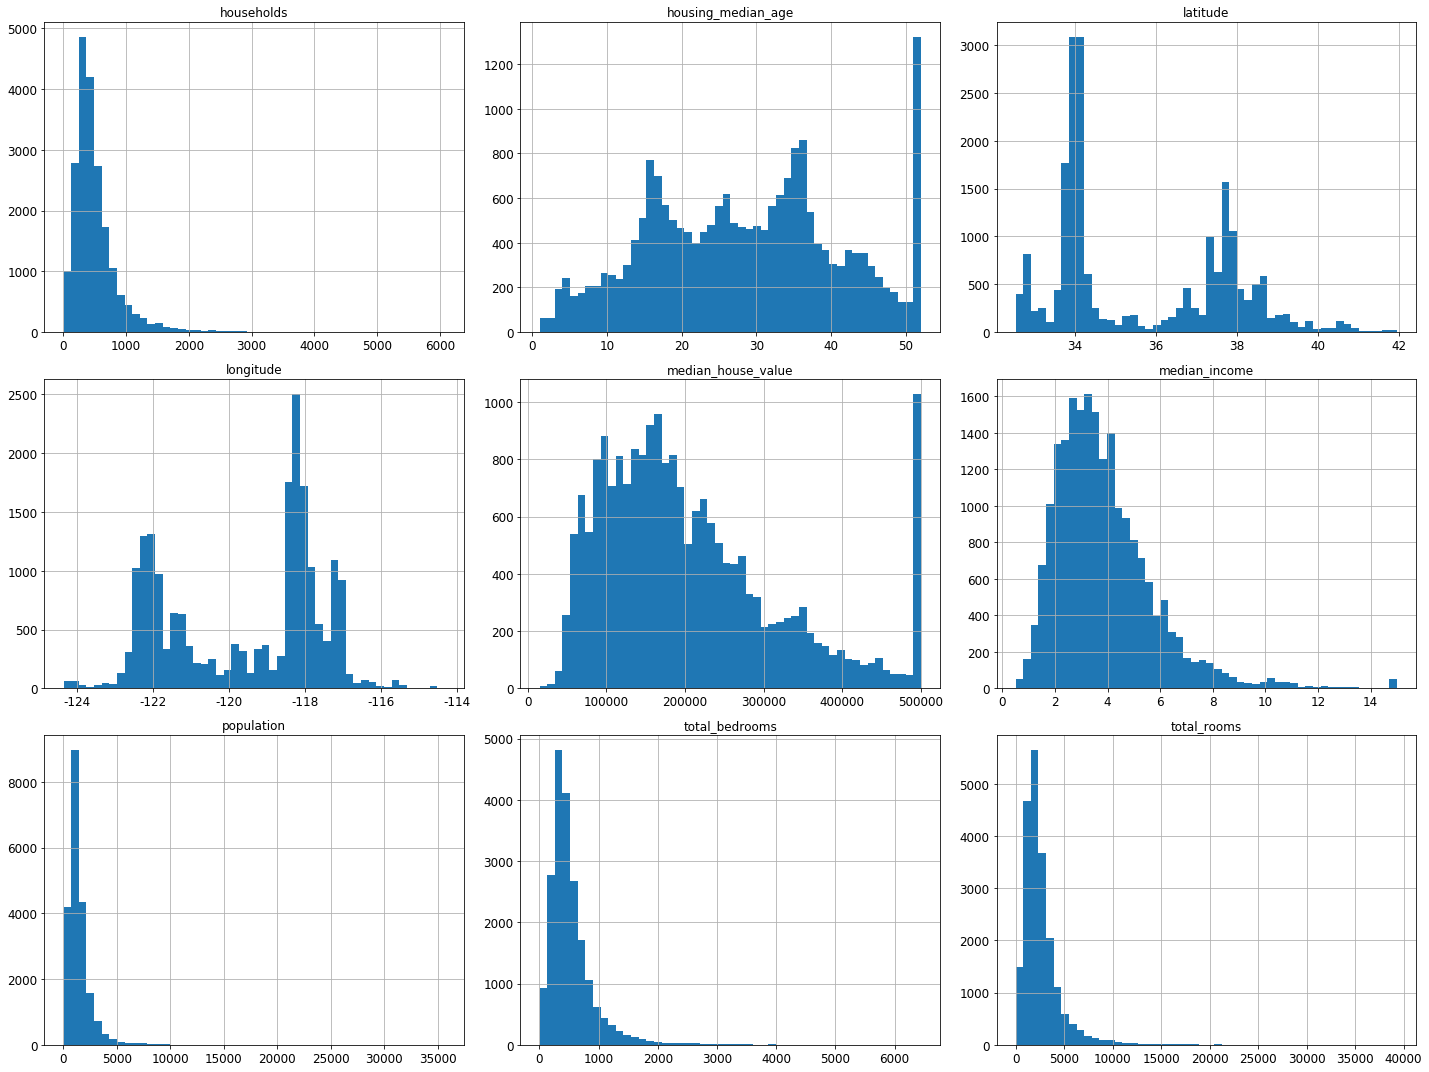

In [59]:
# 히스토그램으로 나타내보기
# bins 는 구간값
housing.hist(bins=50, figsize = (20, 15))
save_fig('attribute_histogram_plots')
plt.show()

훈련, 테스트 세트 나누기 방법1)
-----------------

In [60]:
# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

In [61]:
# 훈련, 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


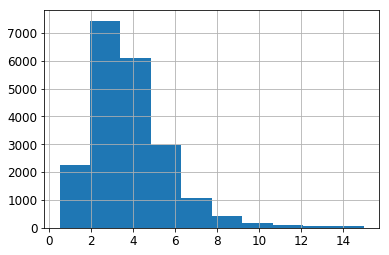

In [62]:
housing['median_income'].hist()

In [63]:
# 소득 카테고리 개수 제한하기 위해 1.5로 나눔
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

# 5 이상은 5로 레이블한다
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [64]:
# income_cat 카테고리별 수 확인해보기
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


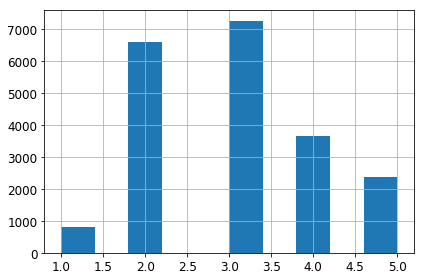

In [65]:
housing['income_cat'].hist()
save_fig('income_category_hist')

훈련, 테스트 세트 나누기 방법2)
-------

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

# 샘플을 계층화시킨 후 인덱스를 반환함 
# n_splits : 셔플을 반복하는 횟수
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    print(train_index)
    strat_test_set = housing.loc[test_index]
    print(test_index)

[17606 18632 14650 ... 13908 11159 15775]
[ 5241 10970 20351 ...  4019 12107  2398]


In [71]:
# 테스트셋의 카테고리별 수 확인해보기
strat_test_set['income_cat'].value_counts()

3.0    1447
2.0    1316
4.0     728
5.0     473
1.0     164
Name: income_cat, dtype: int64

In [72]:
# 테스트셋의 카테고리별 비율 확인해보기
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [73]:
# 테스트셋 확인해보기
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0


In [74]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

데이터 이해를 위한 탐색과 시각화
------------

In [75]:
# housing 변수는 이제 계층화된 훈련셋!!!!
housing = strat_train_set.copy()

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


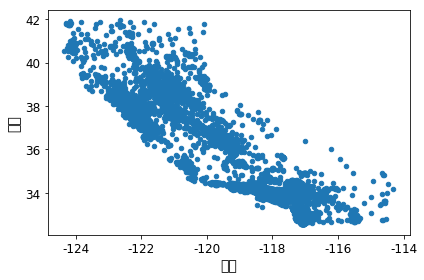

In [78]:
ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
ax.set(xlabel = '경도', ylabel = '위도')
save_fig('bad_visualization_plot')

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


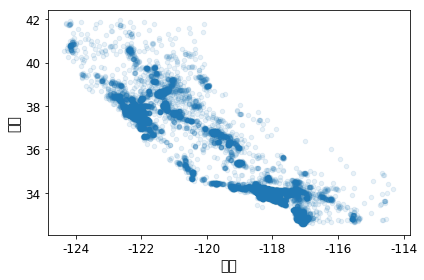

In [79]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
save_fig("better_visualization_plot")

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


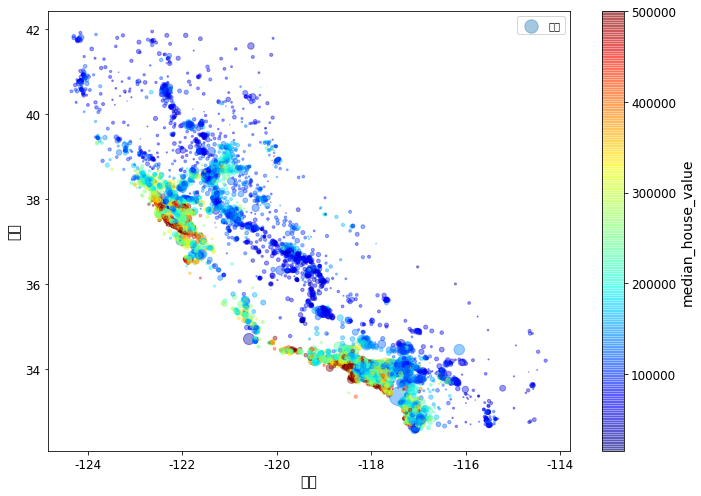

In [80]:
ax = housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
                 s = housing['population']/100, label = '인구', figsize = (10, 7),
                 c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True,
                 sharex = False)
ax.set(xlabel = '경도', ylabel = '위도')
plt.legend()
save_fig('housing_prices_scatterplot')

상관계수 살펴보기
----------

In [84]:
# 상관계수 살펴보기

corr_matrix = housing.corr()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_

In [83]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


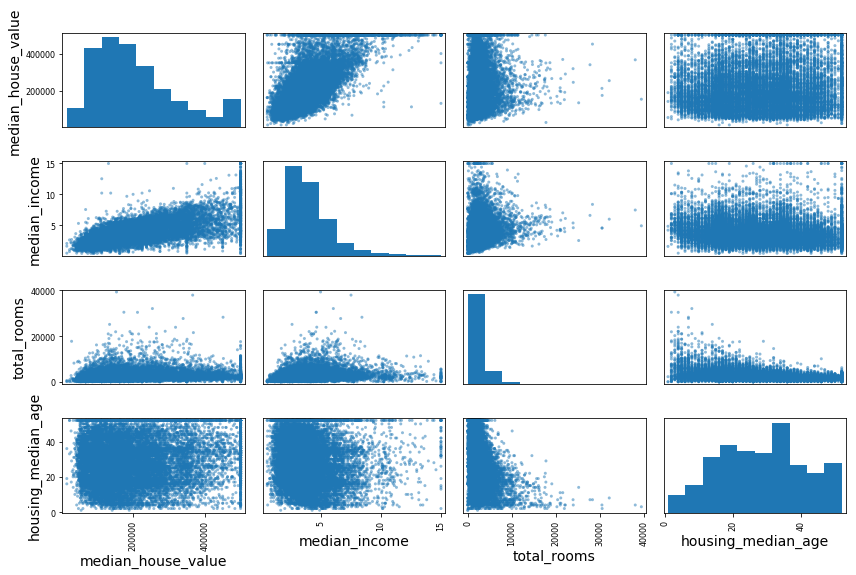

In [85]:
# 중요한 속상만 scatter_matrix로 살펴보기
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))
save_fig('scatter_matrix_plot')

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


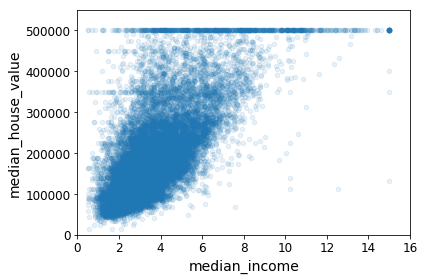

In [86]:
# 가장 상관관계가 높아보이는 속성들 간의 관계 살펴보기
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value',
            alpha = 0.1)
plt.axis([0, 16, 0, 550000]) # 범위 지정
save_fig('income_vs_house_value_scatterplot')

In [87]:
# 특성 조합해보기
housing['rooms_per_household'] = housing['total_rooms'] / housing['households'] # 가구 별 방의 수
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] # 방 별 침실의 수
housing['population_per_household'] = housing['population'] / housing['households'] # 가구 별 인구 수

C:\Users\default.DESKTOP-S5Q9GAA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


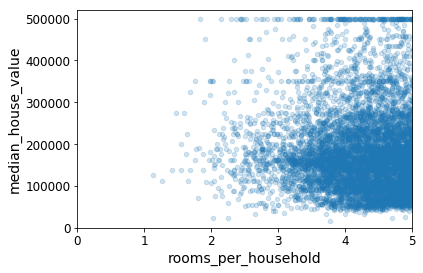

In [88]:
housing.plot(kind = 'scatter', x = 'rooms_per_household', y = 'median_house_value',
            alpha = 0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [89]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


머신러닝 알고리즘을 위한 데이터 준비
---------------

In [91]:
# 훈련 세트를 위해 레이블 제거
# 이제 housing 변수는 median_house_value 레이블이 없는 데이터!!
housing = strat_train_set.drop('median_house_value', axis = 1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [94]:
# 훈련 세트에서 레이블!
housing_labels = strat_train_set['median_house_value'].copy()
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

널 값이 있는 데이터 전처리 방법1)
--------------

In [95]:
# null값이 있는 total_bedrooms 특성
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [99]:
# null값이 있는 샘플 제거하기
# 어느 컬럼의 null값을 확인할지 지정한 후 null값 제거
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [100]:
# null값이 있는 컬럼 전체 제거하기
sample_incomplete_rows.drop('total_bedrooms', axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [103]:
# null값을 중간값으로 대체하기
median = housing['total_bedrooms'].median()
print(median)
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace = True)
sample_incomplete_rows

433.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


널 값이 있는 데이터 전처리 방법2)
--------------

In [104]:
# imputer 클래스를 사용해 null값 채우기
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [105]:
# 중간값이 수치형 특성에서만 계산될 수 있기 때문에 텍스트 특성 제거
housing_num = housing.drop('ocean_proximity', axis = 1)

In [107]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [108]:
# 생성한 중간값을 컬럼별로 확인해보기
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [109]:
# 수동으로 계산한 값과 같은지 확인해보기
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [116]:
# 훈련 세트 변환
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [111]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = list(housing.index.values))

In [113]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [117]:
# 널 값이 있는 샘플의 인덱스를 찾아서 변환되었는지 여부를 확인
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [118]:
imputer.strategy

'median'

In [119]:
# 인덱스 0부터 시작하게!
housing_tr = pd.DataFrame(X, columns = housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


범주형 데이터 전처리하기 방법1)
-------------

In [123]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [124]:
# panda의 factorize() 메소드는 문자열 범주형 특성을
# 머신러닝 알고리즘이 다루기 쉬운 숫자 범주형 특성으로 변환 시켜줌
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [125]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [126]:
housing_cat.factorize()

(array([0, 0, 1, ..., 2, 0, 3], dtype=int64),
 Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object'))

In [140]:
#원-핫 인코딩으로 반환되는 값은 ‘(행 위치, 특성 숫자)  1’ 이다
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = 'auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_1hot[:10])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (6, 0)	1.0
  (7, 2)	1.0
  (8, 0)	1.0
  (9, 0)	1.0


In [128]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [132]:
encoder.categories_

[array([0, 1, 2, 3, 4], dtype=int64)]

범주형 데이터 전처리하기 방법2)
------------------

In [133]:
from sklearn.preprocessing import OrdinalEncoder

In [137]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.]])

In [138]:
ordinal_encoder.categories_

[array([0, 1, 2, 3, 4], dtype=int64)]